# Matplotlib, Seaborn, 그리고 Plotly Dash를 사용한 금융 시장 데이터 시각화

데이터 작업의 첫 번째 단계는 데이터를 시각화하고 탐색하는 것입니다. 
이는 특히 거래를 위해 사용하는 금융 시장 데이터를 다룰 때 더욱 중요합니다. 

이 장에서는 pandas, Matplotlib, Seaborn, Plotly, 그리고 Plotly Dash라는 다섯 가지 강력한 데이터 시각화 기법을 소개합니다.

각 도구는 장단점이 있으며, 사용 사례에 따라 선택해야 합니다. 


* pandas는 Matplotlib과 Plotly를 사용하여 차트를 렌더링하는 내장 플로팅 기능을 제공

####  주요 특징 

| 툴 | 특징 | 비고 |  
| --- | --- | --- |
| Matplotlib | 3차원 표면 및 애니메이션 차트 포함한 고급 기능 제공| |
| Seaborn | 다양한 통계적 데이터 시각화를 제공| |
| Plotly | JavaScript를 사용하여 상호작용형 차트를 생성 |   |   
| Plotly Dash | Python으로 상호작용형 웹 애플리케이션을 구축하기 위한 프레임워크 || 


이 장에서는 다음을 학습합니다.  
- Pandas를 사용한 데이터 빠르게 시각화하기
- Matplotlib을 사용하여 수익률 곡선의 변화를 애니메이션으로 표현하기
- Matplotlib을 사용하여 옵션 암묵적 변동성 곡면 그리기
- Seaborn을 사용하여 통계적 관계 시각화하기
- Plotly Dash를 사용하여 상호작용형 PCA 분석 대시보드 생성하기

---

In [ ]:
# matplotlib 라이브러리와 한글 폰트 지원을 위한 koreanize-matplotlib 불러오기
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 간단한 그래프를 그려서 한글 폰트가 정상적으로 적용되는지 테스트
# x축: [1,2,3], y축
# : [1,4,9]로 2차 함수 형태의 그래프 생성
plt.plot([1, 2, 3], [1, 4, 9])

# 그래프의 제목과 축 레이블에 한글을 사용하여 폰트 적용 확인
plt.title("한글 제목 테스트")  # 그래프 제목
plt.xlabel("X축")  # x축 레이블
plt.ylabel("Y축")  # y축 레이블

# 그래프 출력
plt.show()

## pandas를 사용한 데이터 빠르게 시각화하기

pandas는 범용 데이터 조작 라이브러리입니다. Chapter 1(최첨단 Python 라이브러리를 사용하여 무료 금융 시장 데이터 획득하기) 및 Chapter 2(pandas를 사용하여 금융 시장 데이터 분석 및 변환하기)에서 확인한 것처럼, 데이터 획득 및 조작에 사용할 수 있을 뿐만 아니라 플로팅에도 사용할 수 있습니다. 

pandas는 플로팅 시 공통 메서드를 사용하는 다양한 **"백엔드"** 제공
이 레시피에서는 기본 백엔드인 **Matplotlib**을 사용하여 금융 시장 데이터를 빠르게 시각화하는 방법을 배웁니다.


* 여기에는 **라인 차트, 막대 차트, 히스토그램** 등이 포함됩니다.

---

### matplotlib - pandas

Matplotlib Plot은 pandas를 통해 가져와 사용할 수 있습니다.

1. 라이브러리 호출 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from openbb import obb
from pandas.plotting import bootstrap_plot, scatter_matrix

In [4]:
obb.user.preferences.output_type = "dataframe"

2. 주가 데이터를 다운로드
* "yfinance" 제공자를 사용하여 "AAPL" 주식의 과거 가격 데이터를 가져와서 'df'에 저장

In [5]:
df = obb.equity.price.historical("AAPL", provider="yfinance")
df.head()

,open,high,low,close,volume,dividend
date,,,,,,
2023-12-29,193.899994,194.399994,191.729996,192.529999,42628800,0.0
2024-01-02,187.149994,188.440002,183.889999,185.639999,82488700,0.0
2024-01-03,184.220001,185.880005,183.429993,184.250000,58414500,0.0
2024-01-04,182.149994,183.089996,180.880005,181.910004,71983600,0.0
2024-01-05,181.990005,182.759995,180.169998,181.179993,62303300,0.0


3. 종가를 플롯하는 라인 차트 생성

<Axes: xlabel='date'>

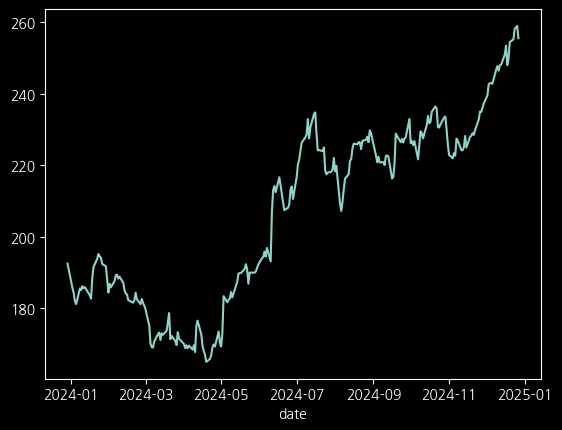

In [6]:
df.close.plot()

추가 스타일 옵션을 사용하여 일일 수익률 막대 차트 

* 종가 변화율을 계산하여 'returns'에 저장합니다

In [7]:
returns = df.close.pct_change()
returns.name = "return"

In [8]:
returns.head()

date
2023-12-29         NaN
2024-01-02   -0.035787
2024-01-03   -0.007488
2024-01-04   -0.012700
2024-01-05   -0.004013
Name: return, dtype: float64

막대 차트
* 제목이 있고 격자와 x축 눈금이 없는 수익률 막대 차트를 그림(title) 

<Axes: title={'center': 'AAPL returns'}, xlabel='date'>

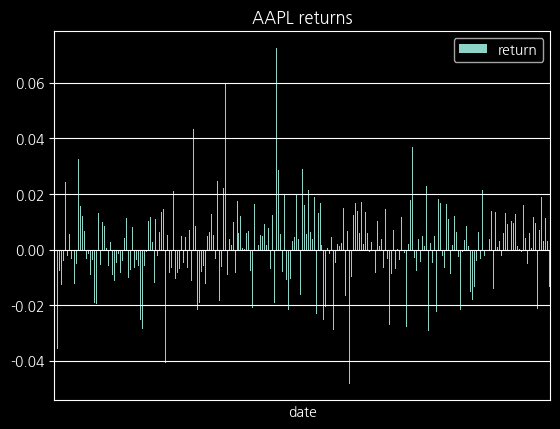

In [9]:
returns.plot.bar(title="AAPL returns", grid=True, legend=True, xticks=[])

5.히스토그램 생성 
 50개의 구간으로 수익률의 히스토 그램(bins)

<Axes: ylabel='Frequency'>

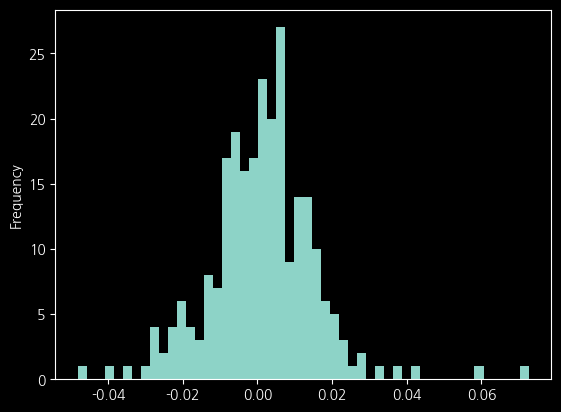

In [10]:
returns.plot.hist(bins=50)

6. 박스-수염(Boxplot) 
* 수익률 박스 플롯
* Box plot의 의미 (1-4분기, 이상치 등) 

<Axes: >

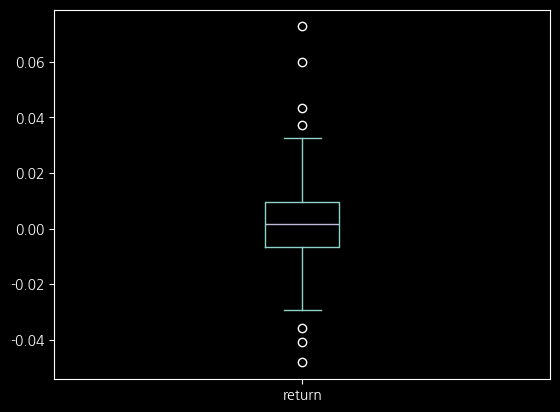

In [11]:
returns.plot.box()

>상자 그림(Box plot)은 숫자 데이터의 분포를 사분위수를 통해 시각적으로 나타내는 그래픽 표현입니다. 
* 상자는 첫 번째 사분위수(Q1)에서 세 번째 사분위수(Q3)까지 걸쳐 있으며, 중앙값(Q2)을 나타내는 선이 포함됩니다. 
* 상자 끝에서 뻗어나가는 "수염(whiskers)"은 데이터 범위를 나타내며, 기본적으로 IQR(사분위 범위, Q3 - Q1)의 1.5배까지 확장됩니다. 
* 수염을 넘어선 데이터 포인트는 이상치로 간주됩니다.

### 작동 방식
pandas의 `plot` 메서드는 DataFrame 및 Series를 사용하여 다양한 유형의 플롯을 생성할 수 있습니다. 
* 내부적으로 pandas는 지정된 백엔드(기본값: Matplotlib)를 사용하여 시각화를 생성합니다. 
* 이 메서드를 사용하려면 먼저 DataFrame 또는 Series를 생성한 다음, 해당 객체에서 `plot` 메서드를 호출하면 됩니다. 
* 플롯의 색상, 크기, 제목, 축 레이블과 같은 외형을 제어하는 추가 매개변수를 선택적으로 지정할 수 있습니다.

>`plot` 메서드를 사용하면 막대 그래프, 밀도 그래프, 산점도 등 다양한 플롯을 생성할 수 있습니다. <br>
`kind` 매개변수를 사용하여 플롯 유형을 정의할 수 있습니다. <br>
그러나 모든 백엔드가 모든 플롯 유형을 지원하는 것은 아닙니다. <br>
예를 들어, `hexbin` 플롯 유형은 Plotly 백엔드에서 작동하지 않습니다. 
자세한 내용은 pandas 문서를 참조하세요.

### 산점도(Scatter plot)
* 정량적 포트폴리오 구성 및 위험 관리에서 일반적으로 수행되는 단계 중 하나는 **두 개 이상의 자산 간 관계**를 분석하는 것입니다. 
* 는 두 주식 간의 관계를 탐색하는 데 사용되는 시각적 표현 유형입니다. 
* 산점도의 각 점은 특정 시점에서 두 주식의 값 쌍을 나타냅니다. 
* 점의 x좌표는 한 주식의 값을, y좌표는 다른 주식의 값을 나타냅니다.

만약 점들이 왼쪽 아래에서 오른쪽 위로 기울어진 패턴을 형성한다면, 이는 주식 간의 양의 상관관계를 나타냅니다. 
* 즉, 한 주식의 가격이 오르면 다른 주식의 가격도 오르는 경향이 있다는 뜻입니다. 
* 반대로 점들이 오른쪽 아래로 기울어진 패턴을 형성한다면 음의 상관관계를 의미하며, 한 주식의 가격이 오를 때 다른 주식의 가격은 하락하는 경향이 있다는 것을 뜻합니다. 
* 점들이 임의로 흩어져 특정한 패턴이 보이지 않는다면, 이는 상관관계가 없거나 약한 것을 나타냅니다.

다음은 AAPL과 나스닥 추적 ETF(QQQ)를 비교하는 예시입니다:

"yfinance" 제공자를 사용하여 "QQQ" 주식의 과거 가격 데이터를 가져와서 'qqq'에 저장합니다

In [12]:
qqq = obb.equity.price.historical("QQQ", provider="yfinance")
qqq.head()

,open,high,low,close,volume,dividend
date,,,,,,
2023-12-29,411.279999,411.640015,407.579987,409.519989,42633400,0.0
2024-01-02,405.839996,406.089996,400.239990,402.589996,58026900,0.0
2024-01-03,399.929993,401.000000,397.890015,398.329987,47002800,0.0
2024-01-04,396.440002,399.589996,396.059998,396.279999,39432800,0.0
2024-01-05,396.450012,399.559998,395.339996,396.750000,44867900,0.0


'QQQ'의 종가 변화율을 계산하여 'qqq_returns'에 저장합니다

In [13]:
qqq_returns = qqq.close.pct_change()
qqq_returns.head()

date
2023-12-29         NaN
2024-01-02   -0.016922
2024-01-03   -0.010582
2024-01-04   -0.005146
2024-01-05    0.001186
Name: close, dtype: float64

'returns'와 'qqq_returns'를 DataFrame 'asset_bench'로 연결하고 열 이름을 변경합니다

In [14]:
asset_bench = pd.concat([returns, qqq_returns], axis=1)
asset_bench.columns = ["AAPL", "QQQ"]
asset_bench.head()

,AAPL,QQQ
date,,
2023-12-29,NaN,NaN
2024-01-02,-0.035787,-0.016922
2024-01-03,-0.007488,-0.010582
2024-01-04,-0.012700,-0.005146
2024-01-05,-0.004013,0.001186


In [15]:
asset_bench.dropna(inplace = True)

결과는 AAPL 수익률과 QQQ 수익률 간의 긍정적인 관계를 나타내는 산점도를 보여줍니다.
* AAPL 수익률과 QQQ 수익률을 점 크기 0.25로 산점도를 그립니다

<Axes: xlabel='QQQ', ylabel='AAPL'>

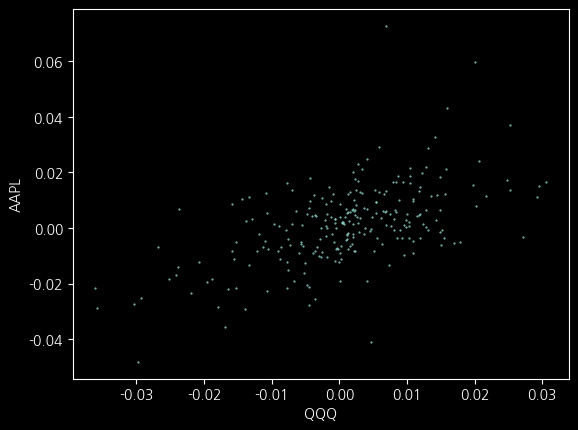

In [16]:
asset_bench.plot.scatter(x="QQQ", y="AAPL", s=0.25)

#### 산점도 행렬(Scatter_matrix)  
* pandas의 scatter_matrix 함수는 **변수들 간의 쌍별 관계를 시각화**합니다. 
* 이 함수는 산점도 행렬을 생성하며, 각 산점도는 두 열을 서로 비교하여 그립니다. 
* 이를 통해 데이터 내의 잠재적인 상관관계나 패턴을 빠르게 시각적으로 검사할 수 있습니다. 
* 또한 주대각선(왼쪽 상단에서 오른쪽 하단까지)에는 각 열의 히스토그램이 표시되어 데이터 분포를 시각화하는 데 도움이 됩니다.

asset_bench의 산점도 행렬을 그립니다

array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='QQQ', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='QQQ'>,
        <Axes: xlabel='QQQ', ylabel='QQQ'>]], dtype=object)

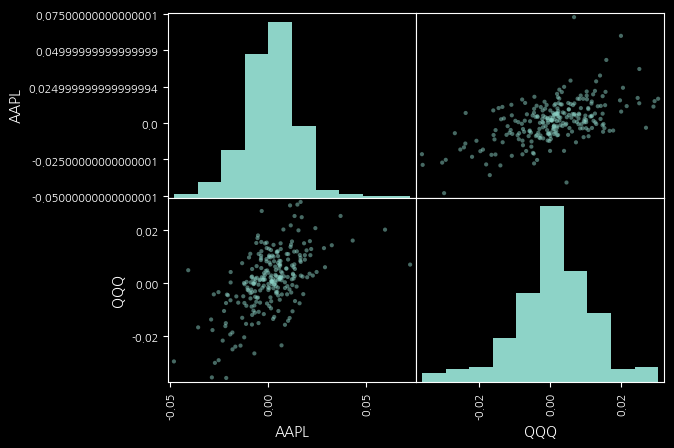

In [17]:
scatter_matrix(asset_bench)

#### bootstrap_plot
* `bootstrap_plot`은 평균, 중앙값, 중간범위를 포함한 특정 통계량과 관련된 **변동성을 시각적으로 평가**하는 데 사용됩니다. 


* 1. 데이터 세트에서 지정된 크기의 부분집합을 **무작위로 샘플링**하고, 이 부분집합에 대해 **목표 통계량을 계산**합니다.
  2. 이 절차는 **미리 정해진 횟수만큼 반복적으로 수행**됩니다.
  3. 이렇게 생성된 **플롯과 히스토그램이 모여 부트스트랩 플롯을 형성**합니다.
  4. 기본적으로 bootstrap_plot은 각 샘플링마다 50개의 데이터 포인트를 선택합니다. 
  5. 결과는 부트스트랩 플롯입니다.

`returns`의 부트스트랩 플롯을 그립니다

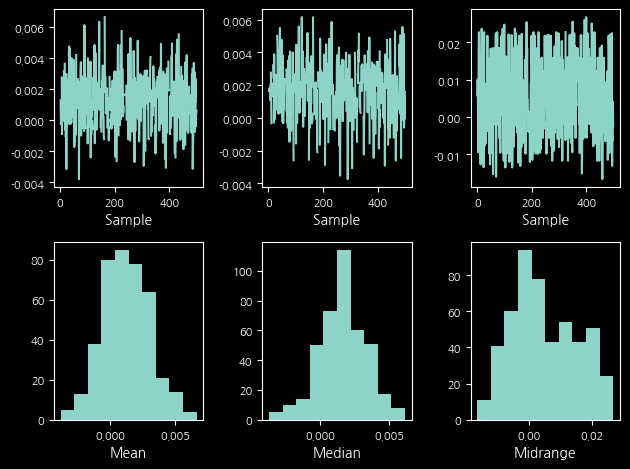

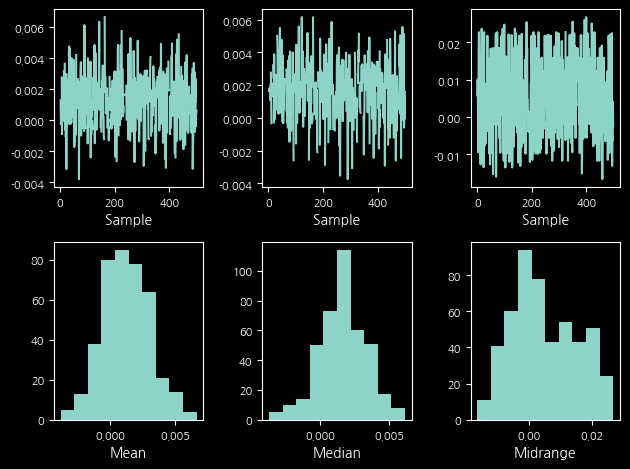

In [18]:
bootstrap_plot(returns)

### 참고 자료
pandas는 플롯(plot)에 대한 자세한 문서를 제공합니다. 자세한 내용은 아래 링크를 참고하세요:

- pandas 플롯 문서: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)  
- pandas `scatter_matrix` 문서: [https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)  
- pandas `bootstrap_plot` 문서: [https://pandas.pydata.org/docs/reference/api/pandas.plotting.bootstrap_plot.html](https://pandas.pydata.org/docs/reference/api/pandas.plotting.bootstrap_plot.html)  

pandas 플로팅의 실제 사용 예를 더 보려면 PyQuant 뉴스레터의 지난 호를 확인하세요: [https://www.pyquantnews.com/past-pyquant-newsletter-issues](https://www.pyquantnews.com/past-pyquant-newsletter-issues)

--- 

## Matplotlib을 사용한 수익률 곡선의 변화 애니메이션화

* 데이터를 시간에 따라 변화하는 모습으 시각화하고자 할 때 사용함 
* 수익률 곡선(yield curve)은 동일한 신용등급의 채권이 만기에 따라 가지는 수익률을 나타내며, 일반적으로 우상향하는 경향이 있습니다. 
* 이는 장기 채권이 단기 채권보다 더 높은 수익률을 가지기 때문이며, 이는 장기 채권 보유 시 더 많은 위험(예: 인플레이션, 높은 이자율 변동성)을 감수해야 하기 때문입니다.
* 그러나 때로는 수익률 곡선이 역전되기도 합니다. 이는 단기 채권이 장기 채권보다 더 높은 수익률을 제공한다는 것을 의미합니다. 

**많은 트레이더와 경제학자들은 역전된 수익률 곡선을 경기 침체의 전조로 간주합니다.** 

* 역전된 수익률 곡선은 역사적으로 미국 경기 침체에 앞서 나타나며, 이는 미래 금리 하락과 경제 둔화를 예상하는 투자자들의 심리를 반영합니다. 
* 이러한 역전은 은행의 수익성을 제한하여 대출 감소와 경제 성장 둔화를 초래할 수 있습니다. 
* 또한, 경기 침체에 대한 기대는 기업과 소비자의 지출 감소로 이어지면서 자기충족적 예언이 될 수 있습니다. 
* 투자자들은 더 안전한 자산으로 자금을 옮길 수 있으며, 이는 위험 자산에 대한 자금 조달을 제한할 수 있습니다.

---

#### 코드 실행

애니메이션화된 플롯을 생성하려면 Matplotlib에서 제공하는 `animation`이라는 특수 기능을 사용해야 합니다.

1. 라이브러리 가져오기 

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb

In [38]:
obb.user.preferences.output_type = "dataframe"

2. 만기 목록 생성 및 데이터 다운로드 
* 국채 만기 정의

In [39]:
maturities = ["3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "30y"]

3. 데이터 정제 
* 연방준비제도로부터 국채 금리 데이터를 가져오고, NaN 값과 불필요한 열을 제거한 후 열 이름을 변경

In [40]:
# 연방준비제도로부터 국채 금리 데이터를 가져옴
# start_date: 1985년 1월 1일부터 데이터 조회
# provider: 연방준비제도 데이터 사용
# dropna: 모든 값이 NaN인 행 제거
# drop: month_1, year_20 열 제거
# columns: 만기 기간으로 열 이름 변경
data = (
    obb.fixedincome.government.treasury_rates(
        start_date="1985-01-01",
        provider="federal_reserve",
    )
    .dropna(how="all")
    .drop(columns=["month_1", "year_20"])
)
data.columns = maturities

In [41]:
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y
date,,,,,,,,,
1985-01-02,0.0810,0.0862,0.0919,0.1003,0.1061,0.1122,0.1168,0.1170,0.1169
1985-01-03,0.0807,0.0862,0.0917,0.1006,0.1055,0.1113,0.1154,0.1162,0.1164
1985-01-04,0.0808,0.0861,0.0917,0.1008,0.1062,0.1119,0.1161,0.1167,0.1170
1985-01-07,0.0806,0.0851,0.0903,0.1001,0.1050,0.1109,0.1141,0.1150,0.1153
1985-01-08,0.0806,0.0848,0.0904,0.0999,0.1048,0.1104,0.1136,0.1145,0.1149


3. 수익률 곡선 역전을 표시하기 위한 불리언 인덱싱 사용

* 수익률 곡선이 역전되었는지 나타내는 열 추가 (30년물 < 3개월물)

In [42]:
data["inverted"] = data["30y"] < data["3m"]

In [43]:
data.head()

,3m,6m,1y,2y,3y,5y,7y,10y,30y,inverted
date,,,,,,,,,,
1985-01-02,0.0810,0.0862,0.0919,0.1003,0.1061,0.1122,0.1168,0.1170,0.1169,False
1985-01-03,0.0807,0.0862,0.0917,0.1006,0.1055,0.1113,0.1154,0.1162,0.1164,False
1985-01-04,0.0808,0.0861,0.0917,0.1008,0.1062,0.1119,0.1161,0.1167,0.1170,False
1985-01-07,0.0806,0.0851,0.0903,0.1001,0.1050,0.1109,0.1141,0.1150,0.1153,False
1985-01-08,0.0806,0.0848,0.0904,0.0999,0.1048,0.1104,0.1136,0.1145,0.1149,False


4. **도형 초기화**:

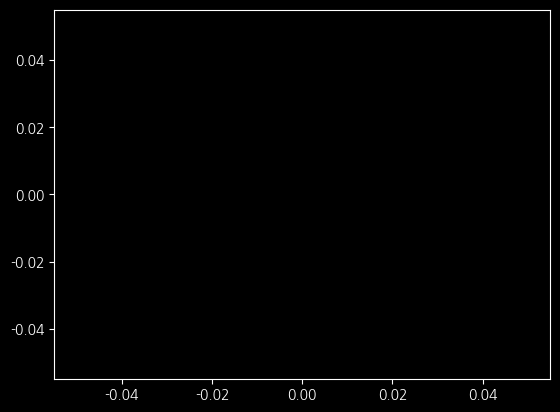

In [44]:
# 그래프를 그리기 위한 figure 객체 생성
fig = plt.figure()

# 1x1 그리드의 첫 번째 위치에 subplot 추가
ax = fig.add_subplot(1, 1, 1)

# 빈 라인 플롯 생성 (나중에 데이터가 추가될 예정)
(line,) = ax.plot([], [])

5. 눈금 범위 설정

In [45]:
# x축 범위를 0-8로 설정 (모든 열을 수용하도록 범위 조정)
ax.set_xlim(0, 8)
# y축 범위를 0-20으로 설정 (금리 범위를 포함하도록)
ax.set_ylim(0, 20)

(0.0, 20.0)

6. 눈금 위치 설정 

In [46]:
# x축 눈금을 0부터 8까지 설정 (9개의 만기 기간에 대응)
ax.set_xticks(range(9))
# y축 눈금을 2부터 18까지 2씩 증가하도록 설정 (수익률 범위)
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

7. **축 레이블 설정**:

In [47]:
# x축 눈금에 만기 기간 레이블 설정
ax.set_xticklabels(maturities)
# y축 눈금에 수익률 값 레이블 설정
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

[Text(0, 2, '2'),
 Text(0, 4, '4'),
 Text(0, 6, '6'),
 Text(0, 8, '8'),
 Text(0, 10, '10'),
 Text(0, 12, '12'),
 Text(0, 14, '14'),
 Text(0, 16, '16'),
 Text(0, 18, '18')]

8. **y축 레이블을 왼쪽으로 강제 배치**:

In [48]:
# y축 레이블과 눈금을 왼쪽에 배치
ax.yaxis.set_label_position("left")  # y축 레이블을 왼쪽에 배치
ax.yaxis.tick_left()  # y축 눈금을 왼쪽에 배치

9. **축 레이블 추가**:

Text(0.5, 1.0, '미국 국채 수익률 곡선')

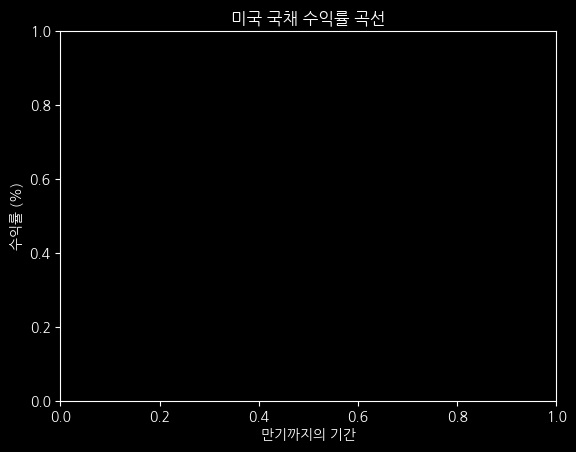

In [49]:
# y축 레이블을 "수익률 (%)"로 설정
plt.ylabel("수익률 (%)")
# x축 레이블을 "만기까지의 기간"으로 설정
plt.xlabel("만기까지의 기간")
# 그래프 제목을 "미국 국채 수익률 곡선"으로 설정
plt.title("미국 국채 수익률 곡선")

10. **애니메이션이 초기화될 때 실행되는 함수 생성**:

In [50]:
def init_func():
    """
    애니메이션의 초기 상태를 설정하는 함수

    Returns:
        tuple: 빈 데이터로 초기화된 line 객체를 포함하는 튜플
    """
    # 라인 객체의 데이터를 빈 리스트로 초기화
    line.set_data([], [])
    # 업데이트된 라인 객체를 튜플로 반환
    return (line,)

11. 데이터를 반복 처리하며 실행되는 함수 생성:

각 프레임마다 플롯을 업데이트하는 애니메이션 함수

In [51]:
def animate(i):
    """
    각 프레임마다 수익률 곡선을 업데이트하는 애니메이션 함수

    Args:
        i (int): 현재 프레임 번호

    Returns:
        tuple: 업데이트된 line 객체를 포함하는 튜플
    """
    # x축 데이터 생성 (만기 기간)
    x = range(0, len(maturities))
    # y축 데이터 가져오기 (해당 시점의 수익률)
    y = data[maturities].iloc[i]
    # 현재 날짜 문자열 생성
    dt_ = data.index[i].strftime("%Y-%m-%d")

    # 수익률 곡선이 역전되었는지 확인하여 색상 설정
    if data.inverted.iloc[i]:
        line.set_color("r")  # 역전된 경우 빨간색
    else:
        line.set_color("y")  # 정상인 경우 노란색

    # 라인 데이터 업데이트
    line.set_data(x, y)

    # 그래프 제목 업데이트 (날짜 포함)
    plt.title(f"미국 국채 수익률 곡선 ({dt_})")
    return (line,)

In [34]:
# 상수 정의
INVERTED_COLOR = "r"  # 역전된 수익률 곡선용 색상
NORMAL_COLOR = "y"  # 정상 수익률 곡선용 색상
DATE_FORMAT = "%Y-%m-%d"


def animate(i):
    """
    각 프레임마다 수익률 곡선을 업데이트하는 애니메이션 함수
    Args:
        i (int): 현재 프레임 번호
    Returns:
        tuple: 업데이트된 line 객체를 포함하는 튜플
    """
    try:
        x = range(0, len(maturities))
        y = data[maturities].iloc[i]
        dt_ = data.index[i].strftime(DATE_FORMAT)

        if data.inverted.iloc[i]:
            line.set_color(INVERTED_COLOR)
        else:
            line.set_color(NORMAL_COLOR)

        line.set_data(x, y)
        plt.title(f"미국 국채 수익률 곡선 ({dt_})")
        return (line,)

    except Exception as e:
        print(f"애니메이션 프레임 {i} 처리 중 오류 발생: {e}")
        return (line,)

12. 애니메이션 생성 및 통합:

In [52]:
# animation.FuncAnimation을 사용하여 애니메이션 생성
# fig: 애니메이션을 표시할 figure 객체
# animate: 각 프레임마다 호출되는 애니메이션 함수
# init_func: 애니메이션 초기화 함수
# frames: 총 프레임 수 (데이터 포인트 수)
# interval: 프레임 간 시간 간격(ms)
# blit: True로 설정하여 변경된 부분만 다시 그리도록 최적화
ani = animation.FuncAnimation(
    fig, animate, init_func=init_func, frames=len(data.index), interval=250, blit=True
)

13. 플롯 유지 및 차트 표시:

In [55]:
# plt.show()
# 주피터 노트북에서 애니메이션 표시
from IPython.display import HTML
plt.rcParams["animation.embed_limit"] = 100 * 1024 * 1024  # 100MB로 제한 증가
# HTML(ani.to_jshtml())

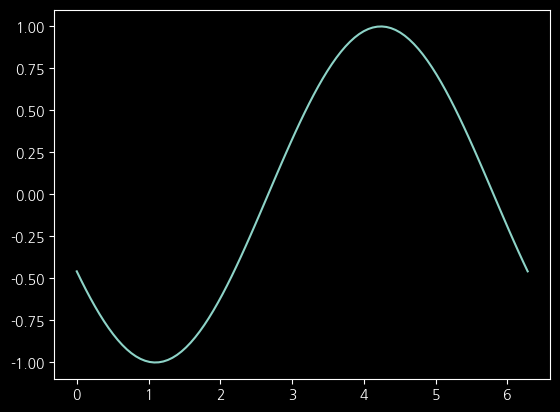

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 주피터 노트북에서 애니메이션을 표시하기 위한 설정
%matplotlib inline
from IPython.display import HTML

# 그래프 설정
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
line, = ax.plot(x, np.sin(x))

# 애니메이션 함수
def animate(frame):
    line.set_ydata(np.sin(x + frame/10.0))
    return line,

# 애니메이션 생성
ani = FuncAnimation(fig, animate, frames=100, 
                   interval=50, blit=True)

# 주피터 노트북에서 애니메이션 표시
HTML(ani.to_jshtml())

---

#### 작동 방식
##### init_func: 초기화 함수 

수익률 데이터를 표시하기 위해 가로축에 만기 시간, 세로축에 수익률 값을 갖는 플롯을 준비합니다. 그런 다음 라인 플롯을 설정하여 데이터를 표시합니다.  
초기화 함수(`init_func`)는 애니메이션의 시작 프레임을 설정합니다. 주요 애니메이션 함수(`animate`)는 데이터가 업데이트되는 곳으로, 각 채권 만기의 수익률 데이터를 다른 시간 포인트에서 다시 그립니다. 특정 날짜에 데이터가 역전된 수익률 곡선을 나타내는 경우, 선의 색상이 빨간색으로 변경되며, 그렇지 않으면 노란색으로 유지됩니다.
##### FuncAnimation : 

* 실제 애니메이션은 `FuncAnimation` 클래스를 사용하여 생성됩니다. 
* 이 클래스는 250밀리초 간격으로 `animate` 함수를 호출합니다. 
* 블리팅(blitting)을 사용하면 플롯의 변경된 부분만 다시 그리도록 하여 애니메이션 효율성을 높입니다. 
* 마지막의 `show` 명령은 애니메이션을 표시합니다.

---

### 더 알아보기...

`FuncAnimation`은 다재다능한 클래스입니다. 위에서 사용된 인수 외에도 다음을 허용합니다:

1. **`repeat`**: 모든 프레임이 표시된 후 애니메이션을 반복할지 여부를 나타내는 부울 값.
2. **`repeat_delay`**: 애니메이션 반복 사이의 지연 시간(밀리초 단위).
3. **`fargs`**: `func`(애니메이션 함수)에 전달할 추가 인수.
4. **`save_count`**: 애니메이션 저장 시 성능을 개선하기 위해 캐시할 프레임 값의 수. `None`인 경우 모든 프레임이 캐시됩니다.
5. **`cache_frame_data`**: `True`로 설정하면 `animate` 함수의 반환값을 캐시하여 긴 애니메이션 저장 속도를 높일 수 있습니다. `False`로 설정하면 저장 과정에서 프레임이 애니메이션 함수에 의해 다시 생성됩니다.
6. **`event_source`**: `EventSource`의 인스턴스 또는 `None`. `None`인 경우 새로운 `TimerBase` 인스턴스가 생성됩니다. 이는 여러 애니메이션을 동기화하려는 경우 유용합니다.

이것들은 `FuncAnimation`에서 사용할 수 있는 주요 인수 중 일부입니다. 또한 몇 가지 내부 및 기본 클래스 인수가 있지만 대부분의 애플리케이션에서 자주 사용되지는 않습니다.

---

### 참고 자료

애니메이션 API는 풍부한 애니메이션 옵션을 제공합니다. 자세한 내용은 다음 링크를 참고하세요:  
- [Matplotlib 애니메이션 API 문서](https://matplotlib.org/stable/api/animation_api.html)

---